No handles with labels found to put in legend.


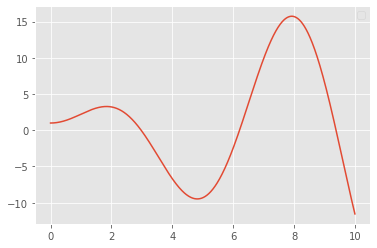

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
x = [0.01*i for i in range(0,1000)]
y = [2 *i * np.sin( i) + np.cos(i) for i in x]
plt.plot(x,y)
plt.legend()

In [2]:
# -*-coding:utf-8 -*-
#目标求解2*x*sin(x)+cos(x)最大值
import random
import math
import matplotlib.pyplot as plt
#初始化生成chromosome_length大小的population_size个个体的二进制基因型种群
def species_origin(population_size,chromosome_length):
    population=[[]]
    #二维列表，包含染色体和基因
    for i in range(population_size):
        temporary=[]
        #染色体暂存器
        for j in range(chromosome_length):
            temporary.append(random.randint(0,1))
            #随机产生一个染色体,由二进制数组成
        population.append(temporary)
            #将染色体添加到种群中
    return population[1:]
            # 将种群返回，种群是个二维数组，个体和染色体两维

In [3]:
#从二进制到十进制
 #input:种群,染色体长度
def translation(population,chromosome_length):
    temporary=[]
    for i in range(len(population)):
        total=0
        for j in range(chromosome_length):
            total+=population[i][j]*(math.pow(2,j))
            #从第一个基因开始，每位对2求幂，再求和
            # 如：0101 转成十进制为：1 * 2^0 + 0 * 2^1 + 1 * 2^2 + 0 * 2^3 = 1 + 0 + 4 + 0 = 5
        temporary.append(total)
        #一个染色体编码完成，由一个二进制数编码为一个十进制数
    return temporary
   # 返回种群中所有个体编码完成后的十进制数

In [4]:
# 目标函数相当于环境 对染色体进行筛选，这里是2*sin(x)+cos(x)
def function(population,chromosome_length,max_value):
    temporary=[]
    function1=[]
    temporary=translation(population,chromosome_length)
    # 暂存种群中的所有的染色体(十进制)
    for i in range(len(temporary)):
        x=temporary[i]*max_value/(math.pow(2,chromosome_length)-1)
        #一个基因代表一个决策变量，其算法是先转化成十进制，然后再除以2的基因个数次方减1(固定值)。
        #function1.append(2*math.sin(x)+math.cos(x))
        function1.append(2*x*math.sin( x)+math.cos(x))
        #这里将2*sin(x)+cos(x)作为目标函数，也是适应度函数
    return function1

In [5]:
def fitness(function1):
    fitness1=[]
    min_fitness=mf=0
    for i in range(len(function1)):
        if(function1[i]+mf>0):
            temporary=mf+function1[i]
        else:
            temporary=0.0
        # 如果适应度小于0,则定为0
        fitness1.append(temporary)
        #将适应度添加到列表中
    return fitness1

In [6]:
#计算适应度和
def sum(fitness1):
    total=0
    for i in range(len(fitness1)):
        total+=fitness1[i]
    return total
 
#计算适应度斐波纳挈列表，这里是为了求出累积的适应度
def cumsum(fitness1):
    for i in range(len(fitness1)-2,-1,-1):
        # range(start,stop,[step])
        # 倒计数
        total=0
        j=0
        while(j<=i):
            total+=fitness1[j]
            j+=1
        #这里是为了将适应度划分成区间
        fitness1[i]=total
        fitness1[len(fitness1)-1]=1

In [7]:
#3.选择种群中个体适应度最大的个体
def selection(population,fitness1):
    new_fitness=[]
    #单个公式暂存器
    total_fitness=sum(fitness1)
    #将所有的适应度求和
    for i in range(len(fitness1)):
        new_fitness.append(fitness1[i]/total_fitness)
    #将所有个体的适应度概率化,类似于softmax
    cumsum(new_fitness)
    #将所有个体的适应度划分成区间
    ms=[]
    #存活的种群
    population_length=pop_len=len(population)
    #求出种群长度
    #根据随机数确定哪几个能存活
 
    for i in range(pop_len):
        ms.append(random.random())
    # 产生种群个数的随机值
    ms.sort()
    # 存活的种群排序
    fitin=0
    newin=0
    new_population=new_pop=population
 
    #轮盘赌方式
    while newin<pop_len:
        if(ms[newin]<new_fitness[fitin]):
            new_pop[newin]=pop[fitin]
            newin+=1
        else:
            fitin+=1
    population=new_pop

In [8]:
def crossover(population,pc):
#pc是概率阈值，选择单点交叉还是多点交叉，生成新的交叉个体，这里没用
    pop_len=len(population)
 
    for i in range(pop_len-1):
        cpoint=random.randint(0,len(population[0]))
        #在种群个数内随机生成单点交叉点
        temporary1=[]
        temporary2=[]
 
        temporary1.extend(pop[i][0:cpoint])
        temporary1.extend(pop[i+1][cpoint:len(population[i])])
        #将tmporary1作为暂存器，暂时存放第i个染色体中的前0到cpoint个基因，
        #然后再把第i+1个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
 
        temporary2.extend(pop[i+1][0:cpoint])
        temporary2.extend(pop[i][cpoint:len(pop[i])])
        # 将tmporary2作为暂存器，暂时存放第i+1个染色体中的前0到cpoint个基因，
        # 然后再把第i个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
        pop[i]=temporary1
        pop[i+1]=temporary2
        # 第i个染色体和第i+1个染色体基因重组/交叉完成

In [9]:
#step4：突变
def mutation(population,pm):
    # pm是概率阈值
    px=len(population)
    # 求出种群中所有种群/个体的个数
    py=len(population[0])
    # 染色体/个体中基因的个数
    for i in range(px):
        if(random.random()<pm):
        #如果小于阈值就变异
            mpoint=random.randint(0,py-1)
            # 生成0到py-1的随机数
            if(population[i][mpoint]==1):
            #将mpoint个基因进行单点随机变异，变为0或者1
                population[i][mpoint]=0
            else:
                population[i][mpoint]=1

In [10]:
# 将每一个染色体都转化成十进制 max_value为基因最大值，为了后面画图用
def b2d(b,max_value,chromosome_length):
    total=0
    for i in range(len(b)):
        total=total+b[i]*math.pow(2,i)
    #从第一位开始，每一位对2求幂，然后求和，得到十进制数？
    total=total*max_value/(math.pow(2,chromosome_length)-1)
    return total
 
#寻找最好的适应度和个体
def best(population,fitness1):
 
    px=len(population)
    bestindividual=[]
    bestfitness=fitness1[0]
 
    for i in range(1,px):
   # 循环找出最大的适应度，适应度最大的也就是最好的个体
        if(fitness1[i]>bestfitness):
 
            bestfitness=fitness1[i]
            bestindividual=population[i]
 
    return [bestindividual,bestfitness]

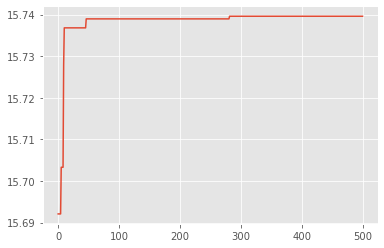

In [11]:
population_size=500
max_value=10
# 基因中允许出现的最大值
chromosome_length=10
pc=0.6
pm=0.01
 
results=[[]]
fitness1=[]
fitmean=[]
 
population=pop=species_origin(population_size,chromosome_length)
#生成一个初始的种群
 
for i in range(population_size):#注意这里是迭代500次
    function1=function(population,chromosome_length,max_value)
    fitness1=fitness(function1)
    best_individual,best_fitness=best(population,fitness1)
    results.append([best_fitness,b2d(best_individual,max_value,chromosome_length)])
     #将最好的个体和最好的适应度保存，并将最好的个体转成十进制
    selection(population,fitness1)#选择
    crossover(population,pc)#交配
    mutation(population,pm)#变异
 
results=results[1:]
results.sort()
X=[]
Y=[]
for i in range(500):#500轮的结果
    X.append(i)
    Y.append(results[i][0])
plt.plot(X,Y)
plt.show()